In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io,data
from skimage.color import rgb2gray
from matplotlib.pyplot import imshow, figure, show,subplot,title
# from matplotlib.pyplot import figure as figure()ure()ure()ure()

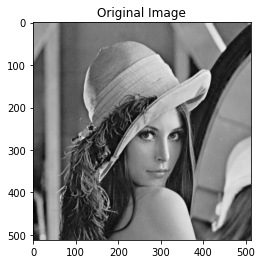

In [2]:
img = io.imread("lena.png")
title("Original Image")
imshow(img, cmap='gray')


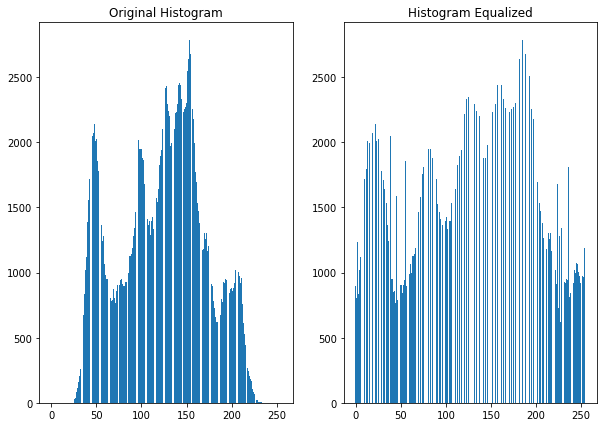

In [3]:
# histogram equalization
def histogram_equalization(img):
    m, n = img.shape
    hist = np.zeros(256)
    for i in range(m):
        for j in range(n):
            hist[img[i, j]] += 1
    figure(figsize=(10,7))
    subplot(1,2,1)
    title("Original Histogram")
    plt.bar(range(256), hist)
    for i in range(256):
        hist[i] = hist[i] / (m * n)
    cdf = np.zeros(256)
    cdf[0] = hist[0]
    for i in range(1, 256):
        cdf[i] = cdf[i - 1] + hist[i]
    cdf = cdf * 255
    cdf = cdf.astype(np.uint8)
    
    img_equalization = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            img_equalization[i, j] = cdf[img[i, j]]
    img_equalization = img_equalization.astype(np.uint8)
    hist2 = np.zeros(256)
    for i in range(m):
        for j in range(n):
            hist2[img_equalization[i, j]%255] += 1
    subplot(1,2,2)
    title("Histogram Equalized")
    plt.bar(range(256), hist2)
    show()
    return img_equalization


imgeq = histogram_equalization(img)


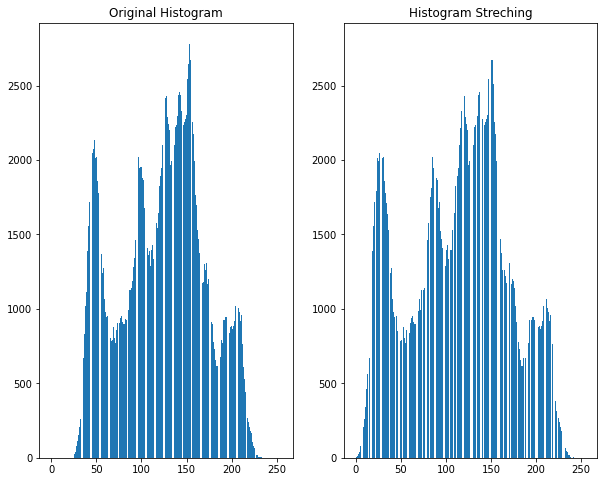

In [4]:
def histogram_streching(img):
    m, n = img.shape
    hist = np.zeros(256)
    for i in range(m):
        for j in range(n):
            hist[img[i, j]] += 1
    figure(figsize=(10, 8))
    subplot(121)
    title("Original Histogram")
    plt.bar(range(256), hist)
    min = 255
    max = 0
    for i in range(256):
        if hist[i] != 0:
            if i < min:
                min = i
            if i > max:
                max = i
    img_streching = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            img_streching[i, j] = (img[i, j] - min) * 255 / (max - min)
    img_streching = img_streching.astype(np.uint8)
    hist2 = np.zeros(256)
    for i in range(m):
        for j in range(n):
            hist2[img_streching[i, j]] += 1
    subplot(122)
    title("Histogram Streching")
    plt.bar(range(256), hist2)

img_streched = histogram_streching(img)


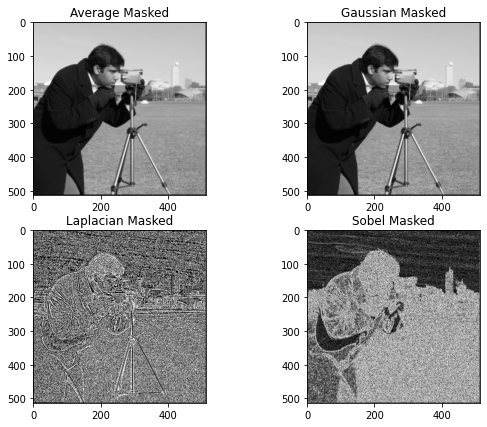

In [5]:
# masking 3*3
def masking(_img, kernel):
    # wraping the image
    m, n = _img.shape
    img= np.zeros((m + 2, n + 2))
    img[1:m + 1, 1:n + 1] = _img
    m,n = img.shape
    
    img2 = img.copy()
    for i in range(m - 2):
        for j in range(n - 2):
            img2[i + 1, j + 1] = np.sum(img[i:i + 3, j:j + 3] * kernel)
    img2 = img2.astype(np.uint8)
    
    return img2
# masks
avg = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9
laplacian = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
gaussian = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16
sobelx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobely = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
prewittx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitty = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

img2 = masking((data.camera()), avg)
figure(figsize=(9,7))
subplot(221)
title("Average Masked")
imshow(img2, cmap = 'gray')
img3 = masking((data.camera()), gaussian)
subplot(222)
title("Gaussian Masked")
imshow(img3, cmap = 'gray')
img4 = masking((data.camera()), laplacian)
subplot(223)
title("Laplacian Masked")
imshow(img4, cmap = 'gray')

img5 = (masking((data.camera()), sobelx)**2 + masking((data.camera()), sobely)**2)**0.5
subplot(224)
title("Sobel Masked")
imshow(img5, cmap = 'gray')
show()


[[161 161 161 ... 168 153 127]
 [161   0   0 ...   0   0 127]
 [161   0   0 ...   0   0 127]
 ...
 [ 41   0   0 ...   0   0  97]
 [ 42   0   0 ...   0   0 106]
 [ 42  42  53 ... 102 104 106]]


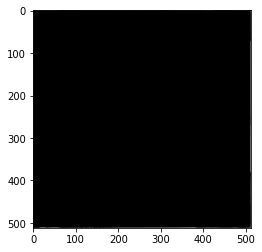

In [6]:
# masking 2*2
def masking2(_img, kernel):
    # wraping the image
    m, n = _img.shape
    
    img2 = _img.copy()
    for i in range(1,m - 1):
        for j in range(1,n - 1):
            img2[i , j] = abs( np.sum(_img[i:i + 1, j:j + 1] * kernel))%255
    img2 = img2.astype(np.uint8)
    
    return img2

# masks
robertsx = np.array([[0, 1], [-1, 0]])
robertsy = np.array([[1, 0], [0, -1]])
print(masking2(img, robertsy))
imshow( masking2(img, robertsy) , cmap = "gray")


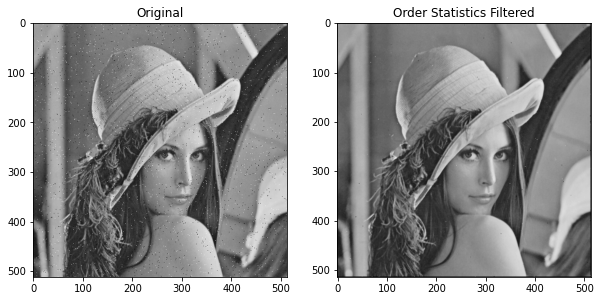

In [7]:
# order statistics filter
def order_statistics_filter(img):
    m, n = img.shape
    img2 = np.zeros((m+2,n+2))
    img2[1:m + 1, 1:n + 1] = img
    m,n = img2.shape
    for i in range(m-2):
        for j in range(n-2):
            img2[i + 1, j +1] = np.median(img[i:i + 2, j:j + 2]) # change median to max or min
    img2 = img2.astype(np.uint8)
    figure(figsize=(10,8))
    subplot(1,2,1)
    title("Original")
    imshow(img, cmap = 'gray')
    subplot(1,2,2)
    title("Order Statistics Filtered")
    imshow(img2, cmap = 'gray')
    show()
    # return img2
order_statistics_filter((io.imread('lena salt.png')))

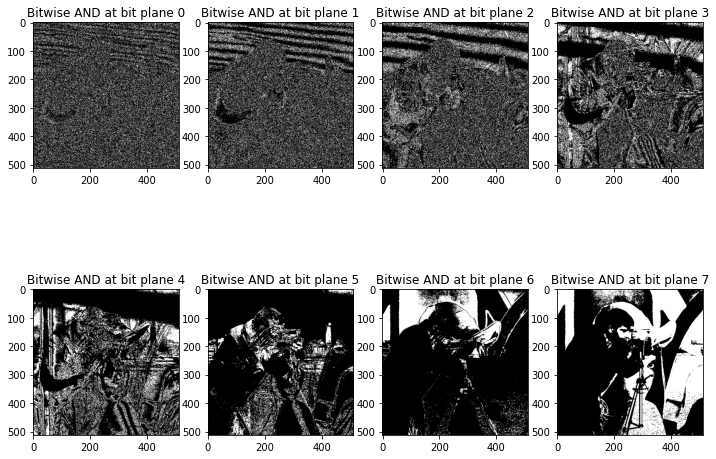

In [8]:
img2 = data.camera()
m, n = img.shape
m2, n2 = img2.shape
m = min(m, m2)
n = min(n, n2)
img = img[:m, :n]
img2 = img2[:m, :n]
figure(figsize = (12, 9))
for k in range(8):
    op = img.copy()
    for i in range(m):
        for j in range(n):
            op[i, j] = (img[i, j] & (1<<k)) & (img2[i, j] & (1<<k))
    subplot(2, 4, k+1)
    title("Bitwise AND at bit plane " + str(k))
    imshow(op, cmap = 'gray')


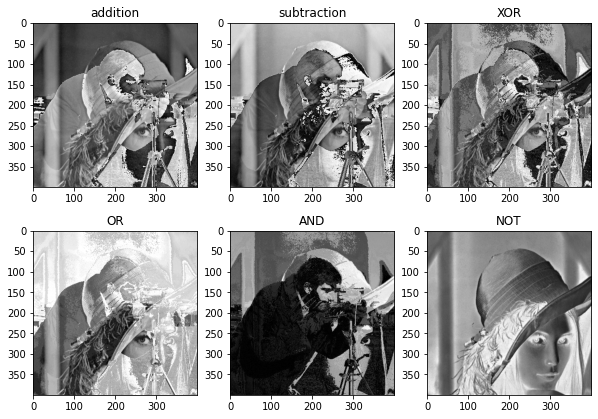

In [9]:
# arithmetic operations and logical operations
img2 = data.camera()
img2 = img2[:400, :400]
img = img[:400, :400]
figure(figsize = (10, 7))
subplot(2, 3, 1)
title("addition")
imshow(img + img2, cmap = 'gray')
subplot(2, 3, 2)
title("subtraction")
imshow(img - img2, cmap = 'gray')
subplot(2, 3, 3)
title("XOR")
imshow(img ^ img2, cmap = 'gray')
subplot(2, 3, 4)
title("OR")
imshow(img | img2, cmap = 'gray')
subplot(2, 3, 5)
title("AND")
imshow(img & img2, cmap = 'gray')
subplot(2, 3, 6)
title("NOT")
imshow(~img, cmap = 'gray')
show()

C:\Users\kesha\AppData\Local\Temp\ipykernel_23700\633899725.py:9: RuntimeWarning: divide by zero encountered in log
  imshow(np.log(1 + img), cmap = 'gray')


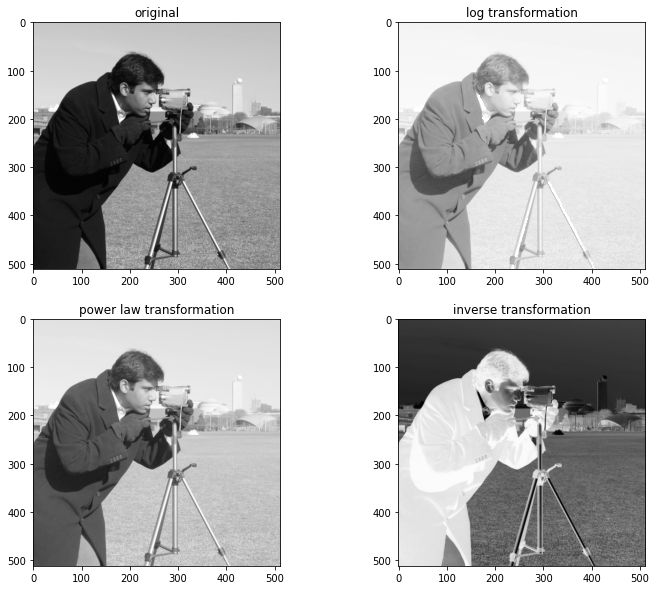

In [10]:
# Point Processing in Spatial domain
img = data.camera()
figure(figsize = (12, 10))
subplot(2, 2, 1)
title("original")
imshow(img, cmap = 'gray')
subplot(2, 2, 2)
title("log transformation")
imshow(np.log(1 + img), cmap = 'gray')
subplot(2, 2, 3)
title("power law transformation")
imshow(255 * (img / 255) ** 0.5, cmap = 'gray') 
subplot(2, 2, 4)
title("inverse transformation")
imshow(255 - img, cmap = 'gray')
show()
